# Proyek Analisis Data: AIR QUALITY DATASET
- **Nama:** Muhammad Zulkarnaini
- **Email:** mc322d5y1104@student.devacademy.id
- **ID Dicoding:** MC322D5Y1104

## Menentukan Pertanyaan Bisnis

- Apakah ada perubahan yang signifikan dalam PM2.5 di setiap bulannya?
- Apakah ada hubungan antara NO2 dan CO?
- Bagaimana perbandingan PM2.5 dengan PM10 setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [28]:
airquality_df = pd.read_csv("C:/KULIAH STATISTIKA UNIVERSITAS SYIAH KUALA/SEMESTER 6/Coding Camp by DBS/Project/Analisis Data With Python/PRSA_Data_Wanliu_20130301-20170228.csv")
airquality_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


**Insight:**
- Pada dataset ini terdapat 18 variabel yang berbeda-beda dengan jumlah baris sebanyak 35064 baris.
- Dataset ini belum bersih, ini bisa dilihat dari beberapa variabel yang masih ada nilai NaN

### Assessing Data

In [29]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset memiliki 35.064 baris dan 18 variabel.
- varibel terdiri dari nilai numerik (int64, float64) dan kategorik (object).
- varibel wd dan station mempunyai tipe data kategorik (object)
- varibel lainnya adalah numerik (int64 dan float64) yaitu PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM.
- Beberapa varibel memiliki data yang hilang (missing values), bisa dilihat dari beberapa variabel yang memiliki jumlah data yang tidak sama atau seragam


In [30]:
airquality_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

**Insight:**
- Variabel O3 memiliki missing value tertinggi yakni sebanyak 2107, kemudian diikuti oleh CO.
- Terdapat 11 varibel dengan missing value .



In [31]:
airquality_df.describe().round(2)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.00,35064.00,35064.00,35064.00,35064.00,34682.00,34780.00,34489.00,33994.00,33252.00,32957.00,35044.00,35044.00,35044.00,35044.00,35050.0
mean,17532.50,2014.66,6.52,15.73,11.50,83.37,110.46,18.38,65.26,1319.35,48.87,13.43,1011.10,3.27,0.07,1.5
std,10122.25,1.18,3.45,8.80,6.92,81.91,92.80,22.61,38.00,1268.11,55.11,11.35,10.36,13.68,0.90,1.1
min,1.00,2013.00,1.00,1.00,0.00,2.00,2.00,0.29,1.64,100.00,0.21,-15.80,985.90,-34.90,0.00,0.0
25%,8766.75,2014.00,4.00,8.00,5.75,23.00,40.00,4.00,36.00,500.00,4.00,3.20,1002.50,-8.10,0.00,0.8
50%,17532.50,2015.00,7.00,16.00,11.50,59.00,88.00,10.00,60.00,900.00,32.00,14.30,1010.80,4.00,0.00,1.2
75%,26298.25,2016.00,10.00,23.00,17.25,116.00,153.00,23.00,88.00,1600.00,73.00,22.90,1019.40,15.80,0.00,2.0
max,35064.00,2017.00,12.00,31.00,23.00,957.00,951.00,282.00,264.00,10000.00,364.00,40.50,1040.30,28.50,72.50,11.2


**Insight:**
- Variabel PM2.5 memiliki nilai mean sebesar 83.37, tapi ada nilai ekstrem hingga 957
- Variabel CO memiliki nilai maksimum 10,000, jauh di atas Q3 1,600, kemungkinan ada outlier



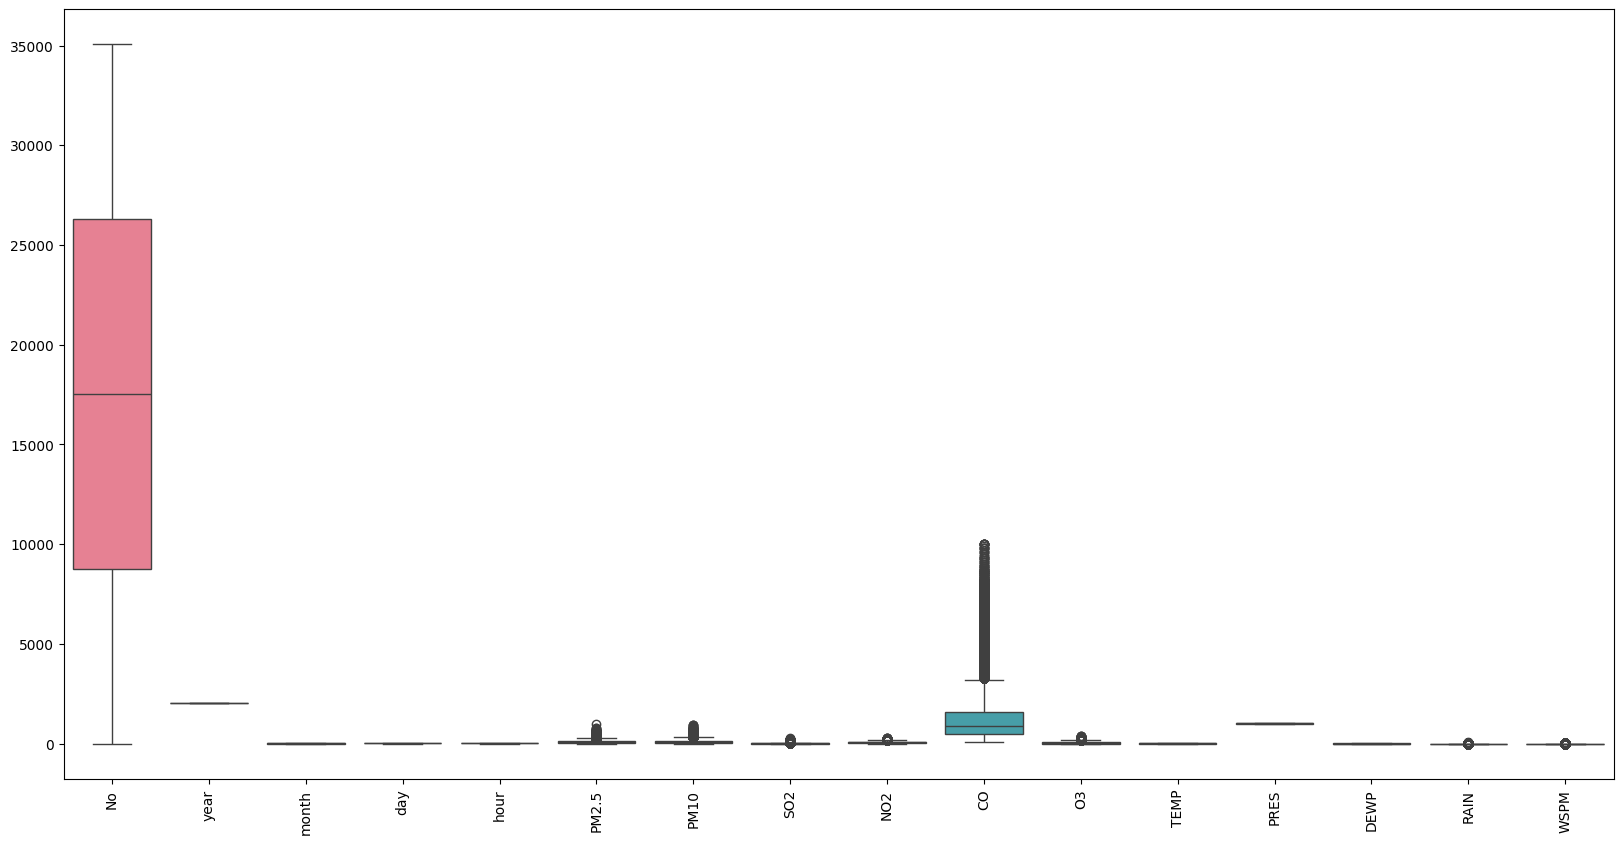

In [32]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=airquality_df)
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Varibel CO memiliki banyak outlier
- Beberapa variabel memiliki distribusi yang cukup stabil




### Cleaning Data

In [33]:
airquality_df.interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14040\644153958.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airquality_df.interpolate(method='linear', limit_direction='forward', inplace=True)


**Insight:**
- Karena dataset ini diambil persatu jam, maka cara yang tepat untuk mengisi nilai kosong ada dengan menggunakan metode interpolasi

In [34]:
airquality_df.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         123
WSPM         0
station      0
dtype: int64

**Insight:**
- Semua missing value pada varibel numerik telah berhasil diisi nilainya
- Varibel wd masih memiliki mising value

In [35]:
modus = airquality_df["wd"].mode()
print(modus)

0    NE
Name: wd, dtype: object


In [36]:
airquality_df["wd"] = airquality_df["wd"].fillna("NE")

**Insight:**
- Mengisi nilai kosong pada variabel wd menggunakan modusnya yaitu nilai NE

In [37]:
airquality_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Semua missing value pada semua variabel telah berhasil ditangani 

## Exploratory Data Analysis (EDA)

### Explore Statistic

In [38]:
airquality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6826,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.425795,1011.102678,3.263752,0.068224,NaN,1.501393,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.348183,10.356118,13.679508,0.896471,NaN,1.104645,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,NaN,0.800000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,NaN,1.200000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,NaN,2.000000,NaN


**Insight:**
- Data mencakup tahun 2013 - 2017 dengan resolusi harian & jam
- pada variebel wd terdapat 16 kategori unik, dengan yang paling umum adalah "NE", menunjukkan angin sering bertiup dari timur laut.
- Rata-rata PM2.5 adalah 83.47, dengan nilai maksimum 957 artinya ada kemungkinan lonjakan polusi ekstrem

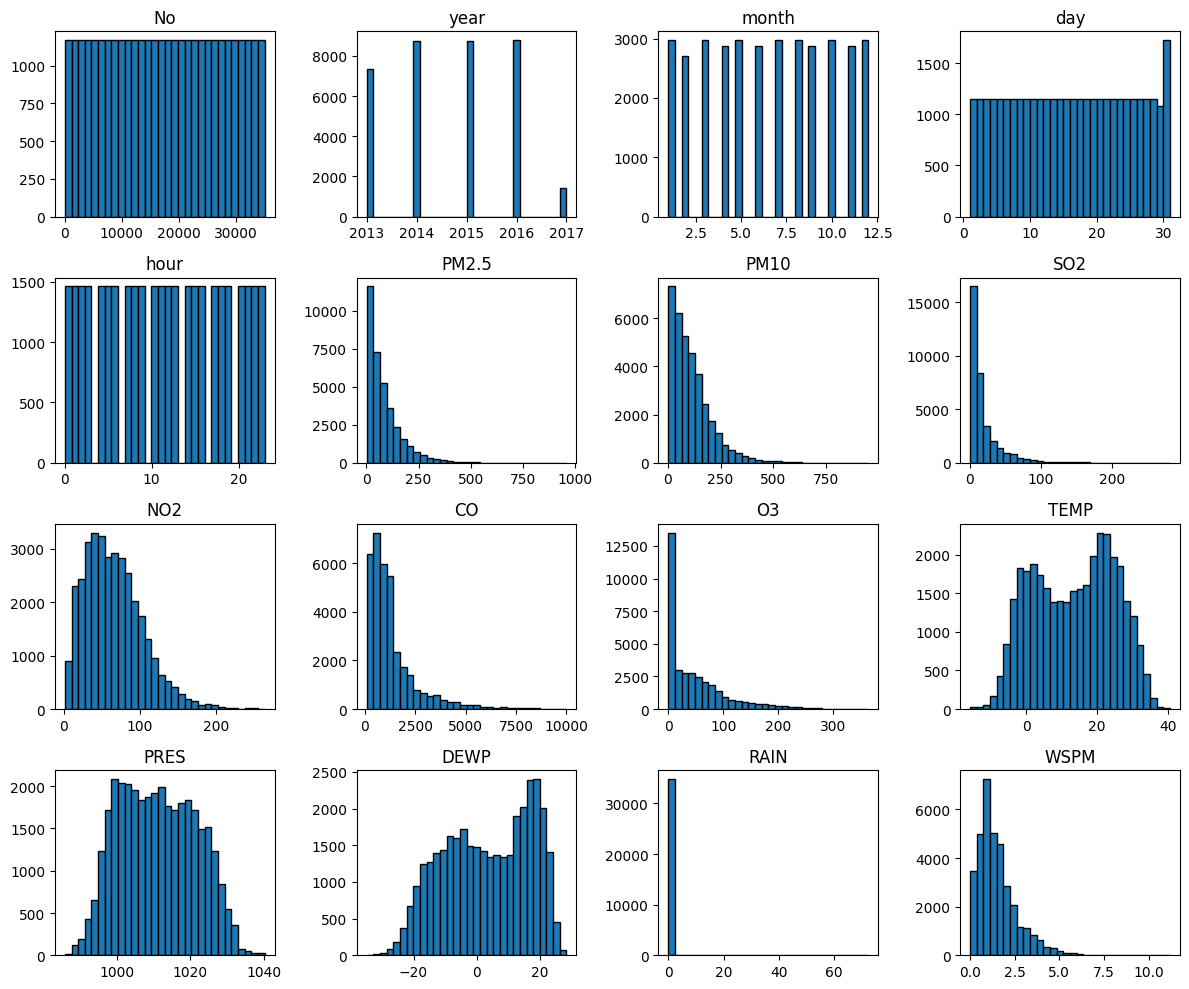

In [39]:
airquality_df.hist(figsize=(12, 10), bins=30, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()



**Insight:**
- Data untuk tahu 2013 dan 2017 lebih sedikit dibanding tahun lainnya
- Varibel PM2.5, PM10, SO2, NO2, CO, dan O3 memiliki distribusi skewed right, kemungkinan menandakan bahwa polusi berat terjadi dalam waktu-waktu tertentu

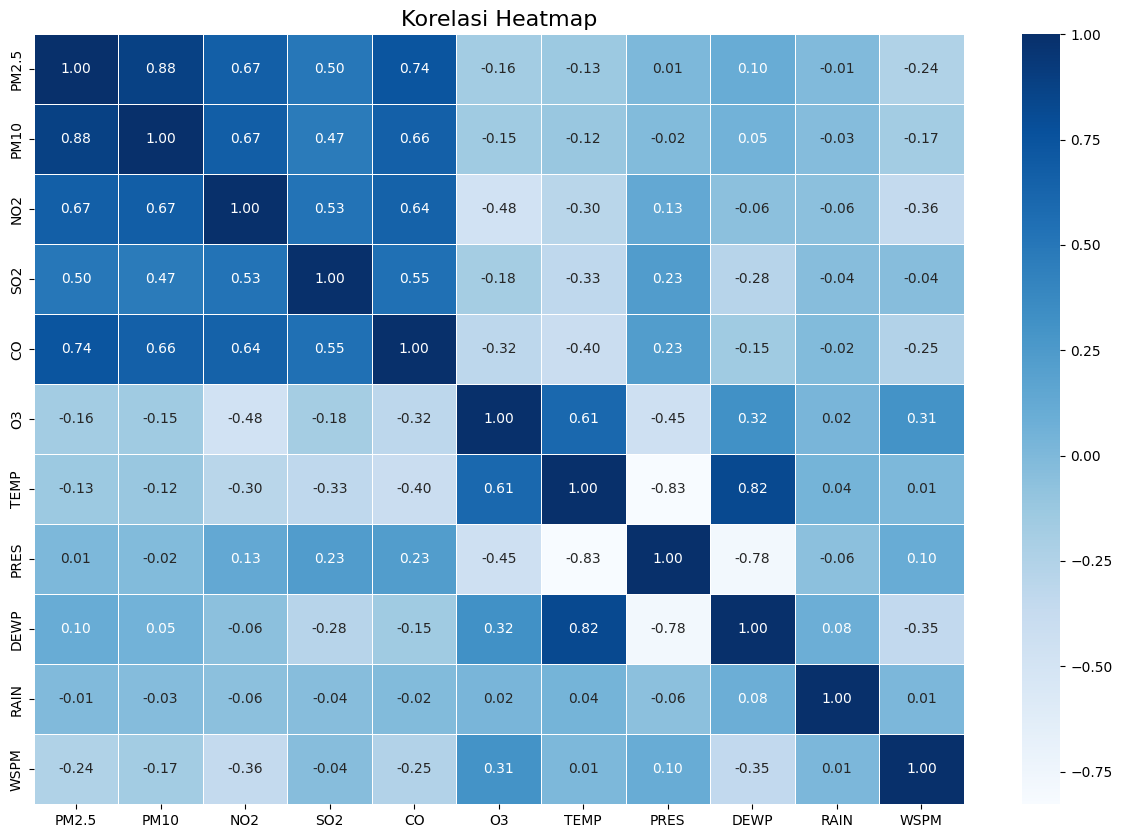

In [40]:
# Menghitung korelasi
korelasi = airquality_df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(korelasi, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Korelasi Heatmap', fontsize=16)
plt.show()


**Insight:**
- Varibel PM2.5 dan PM10 memiliki korelasi tinggi (0.88)
- Variebel NO2, SO2, CO memiliki korelasi positif yang cukup tinggi dengan PM2.5 dan PM10
- Variebel TEMP berkorelasi negatif dengan PM2.5 (-0.13) dan PM10 (-0.12)
- Variebel PRES berkorelasi negatif kuat dengan TEMP (-0.83) , -0.45 dengan O3, dll.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perubahan yang signifikan dalam PM2.5 di setiap bulannya?

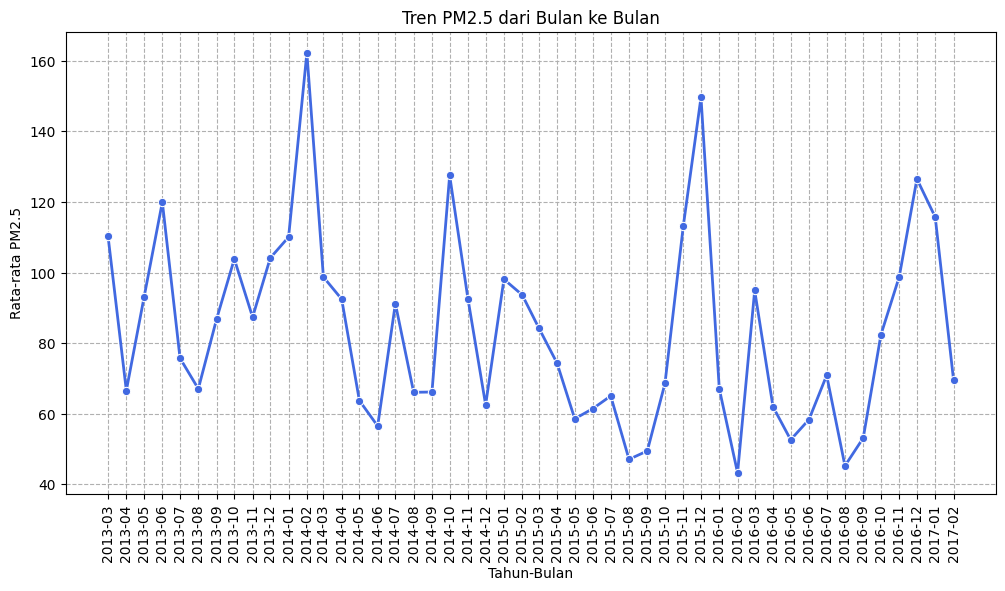

In [41]:
# Buat kolom 'year_month' dalam format datetime
airquality_df['year_month'] = pd.to_datetime(airquality_df[['year', 'month']].assign(day=1))

# Hitung rata-rata bulanan PM2.5
pm25_monthly = airquality_df.groupby('year_month', as_index=False)['PM2.5'].mean()

# Plot trend PM2.5 dari bulan ke bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_monthly, x='year_month', y='PM2.5', marker='o', color='royalblue', linewidth=2)
plt.xticks(ticks=pm25_monthly['year_month'], labels=pm25_monthly['year_month'].dt.strftime('%Y-%m'), rotation=90)


plt.xlabel('Tahun-Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.title('Tren PM2.5 dari Bulan ke Bulan')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')
plt.show()


**Insight:**
- Terdapat perubahan yang signifikan dalam kadar PM2.5 di setiap bulannya, bisa dilihat dari kadar PM2.5 mengalami kenaikan dan penurunan tajam di beberapa periode

### Pertanyaan 2: Apakah ada hubungan antara NO2 dan CO?

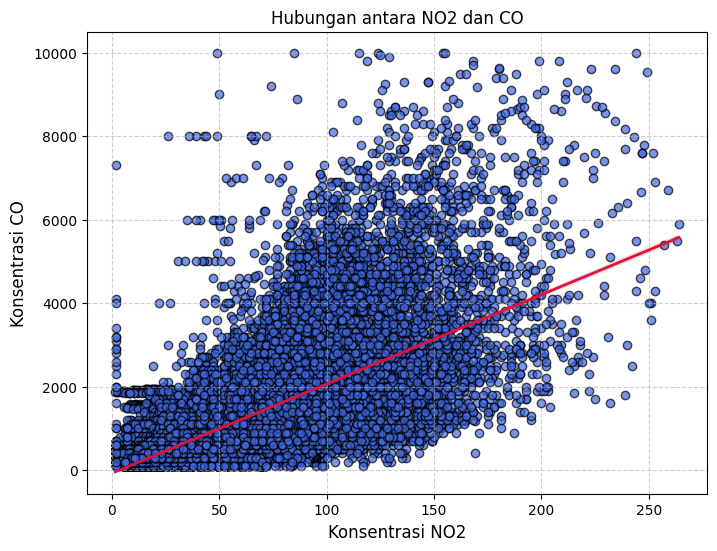

Koefisien korelasi antara NO2 dan CO: 0.64
Artinya :
Terdapat korelasi positif yang moderat/sedang antara NO2 dan CO


In [42]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    airquality_df['NO2'], 
    airquality_df['CO'], 
    color='royalblue',
    alpha=0.7, 
    edgecolor='black'
)

# garis tren
sns.regplot(
    x='NO2', 
    y='CO', 
    data=airquality_df, 
    scatter=False, 
    color='crimson',  # Warna garis tren
    line_kws={"linewidth": 2}
)

# Menambahkan judul dan label sumbu
plt.title('Hubungan antara NO2 dan CO')
plt.xlabel('Konsentrasi NO2', fontsize=12)
plt.ylabel('Konsentrasi CO', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Menghitung korelasi antara NO2 dan CO
correlation = airquality_df['NO2'].corr(airquality_df['CO'])
print(f'Koefisien korelasi antara NO2 dan CO: {correlation:.2f}')
print(f'Artinya :')

# Menentukan kekuatan korelasi
if correlation > 0.7:
    print("Terdapat korelasi positif yang kuat antara NO2 dan CO")
elif correlation < -0.7:
    print("Terdapat korelasi negatif yang kuat antara NO2 dan CO")
elif correlation > 0.3:
    print("Terdapat korelasi positif yang moderat/sedang antara NO2 dan CO")
elif correlation < -0.3:
    print("Terdapat korelasi negatif yang moderat/sedang antara NO2 dan CO")
else:
    print("Terdapat korelasi yang lemah atau tidak ada korelasi antara NO2 dan CO")


**Insight:**
- Terdapat korelasi positif yang moderat/sedang antara NO2 dan CO yaitu sebesar 0.64, ini bisa dilihat dari garis line dan keluaran kekuatan korelasi 

### Pertanyaan 3: Bagaimana perbandingan PM2.5 dengan PM10 setiap tahunnya?

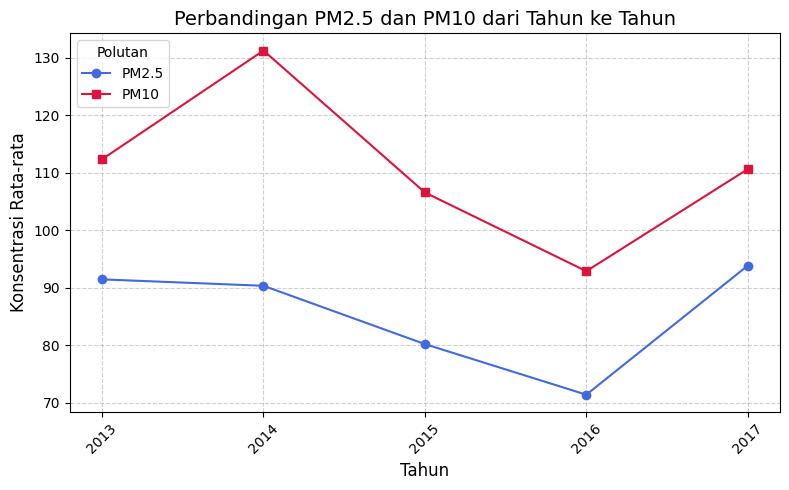

In [43]:

# Menghitung rata-rata PM2.5 dan PM10 untuk setiap tahun
pm_yearly = airquality_df.groupby('year')[['PM2.5', 'PM10']].mean()

# Membuat plot perbandingan PM2.5 dan PM10 dari tahun ke tahun
plt.figure(figsize=(8, 5))
plt.plot(pm_yearly.index, pm_yearly['PM2.5'], marker='o', linestyle='-', label='PM2.5', color='royalblue')
plt.plot(pm_yearly.index, pm_yearly['PM10'], marker='s', linestyle='-', label='PM10', color='crimson')

# Menambahkan label dan judul
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi Rata-rata', fontsize=12)
plt.title('Perbandingan PM2.5 dan PM10 dari Tahun ke Tahun', fontsize=14)

# Menyesuaikan tampilan sumbu x
plt.xticks(pm_yearly.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Polutan', loc='upper left')
plt.tight_layout()

# Menampilkan plot
plt.show()


**Insight:**
- PM10 selalu lebih tinggi dari PM2.5 setiap tahunnya, ini bisa dilihat dari garis merah yang mewakili PM10 yang selalu berada diatas garis biru yang mewakili PM2.5
- Fluktuasi konsentrasi terjadi setiap tahun
- Perubahan PM10 lebih drastis dibanding PM2.5

## Conclusion

- Conclution pertanyaan 1 (Apakah ada perubahan yang signifikan dalam PM2.5 di setiap bulannya?)
>Terdapat perubahan yang signifikan dalam kadar PM2.5 di setiap bulannya
- Conclution pertanyaan 2 (Apakah ada hubungan antara NO2 dan CO?)
>Terdapat korelasi positif yang moderat/sedang antara NO2 dan CO yaitu sebesar 0.64
- Conclution pertanyaan 3 (Bagaimana perbandingan PM2.5 dengan PM10 setiap tahunnya?)
> PM10 selalu lebih tinggi dari PM2.5 setiap tahunnya

